In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [7]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2,
       0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0,
       1])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,2,2
6,2,2
7,1,1
8,1,1
9,1,1


In [13]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [15]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.81819521e+00, -1.01914424e-01,  3.16789235e+00,
        -6.33122565e-01,  2.64408105e-02, -2.24613281e+00,
         4.40337543e+00,  1.93249185e+00,  2.17885613e-01,
        -7.75013017e-01,  1.83613426e+00,  4.00266142e+00,
         1.59001135e-02],
       [-2.21546782e+00, -7.70738457e-01, -5.09994891e+00,
         3.62656514e-01, -2.61084431e-02,  7.17182449e-02,
         1.71711987e+00,  6.73954949e+00,  1.79836167e-01,
        -5.22963963e-01,  4.19775721e+00,  3.09608297e-01,
        -6.63779897e-03],
       [-2.37736827e-01,  1.20439552e+00,  3.40027243e+00,
         2.43223085e-01,  5.24982107e-03,  2.57028364e+00,
        -7.64969601e+00, -1.17698977e+01, -5.11849937e-01,
         1.65661348e+00, -8.08306169e+00, -5.19504686e+00,
        -9.57944457e-03]])

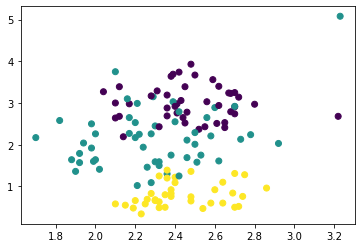

In [16]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [17]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

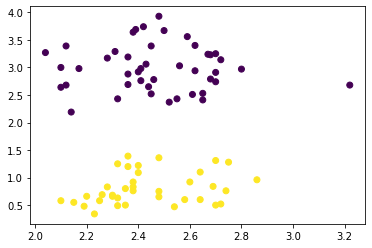

In [18]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [19]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [20]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.46909091, 2.99227273],
       [2.4372973 , 0.80405405]])

<ipython-input-27-a5d3738cda27>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


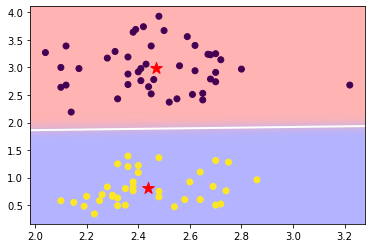

In [27]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [28]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  0.94724796, -16.41737594]])

In [29]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [40]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [43]:
lr.predict(small_test)

array([2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0])

In [44]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [45]:
lr.coef_

array([[ 0.03026109, -3.15023982]])

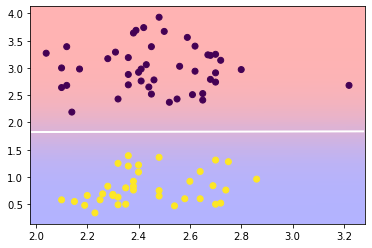

In [46]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [47]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [48]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [49]:
X

array([[ 1.33117086e+01, -5.13932786e-01],
       [ 8.92971805e+00,  5.54133238e+00],
       [ 2.89021285e+00, -1.09071765e+01],
       [ 3.23377835e+00, -1.07923144e+01],
       [ 1.44631804e+00, -4.84271320e+00],
       [ 7.62918697e+00, -2.30398079e-01],
       [ 1.64334545e+00, -1.22731737e+01],
       [ 6.37742068e+00,  2.92249573e+00],
       [ 2.34460551e+00, -8.51775687e+00],
       [ 4.04012205e+00, -3.90798082e+00],
       [ 8.34914947e+00, -8.14732480e-01],
       [ 4.29401067e+00, -6.33499785e+00],
       [ 2.17996848e+00, -3.93861699e+00],
       [ 9.68750793e+00, -1.52345086e+00],
       [ 1.46051268e+00, -7.73623156e+00],
       [ 1.42305331e+01, -4.66978638e+00],
       [-2.12433861e-01, -7.82092120e+00],
       [ 3.27965873e+00, -4.98948246e+00],
       [ 3.58988429e+00, -8.05054910e+00],
       [ 1.10127590e+01, -2.71407616e+00],
       [ 4.38028737e+00,  9.53000267e-01],
       [ 8.89855859e+00,  1.78813371e+00],
       [ 1.49112118e+00, -8.32714681e+00],
       [ 2.

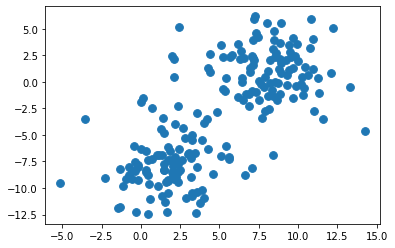

In [50]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [51]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [53]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

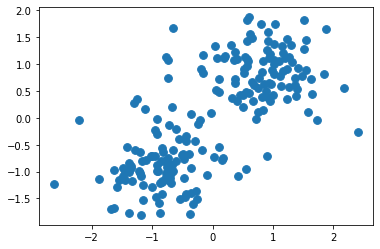

In [54]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [55]:
from sklearn.cluster import KMeans

In [56]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0])

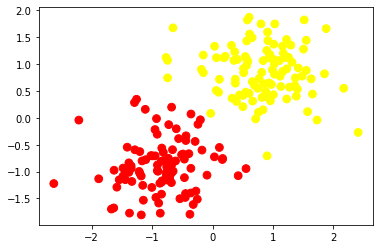

In [57]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [58]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

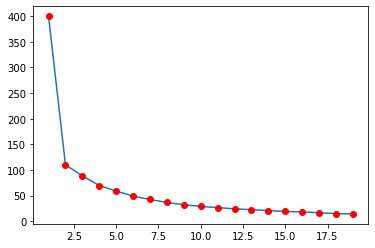

In [59]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [60]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

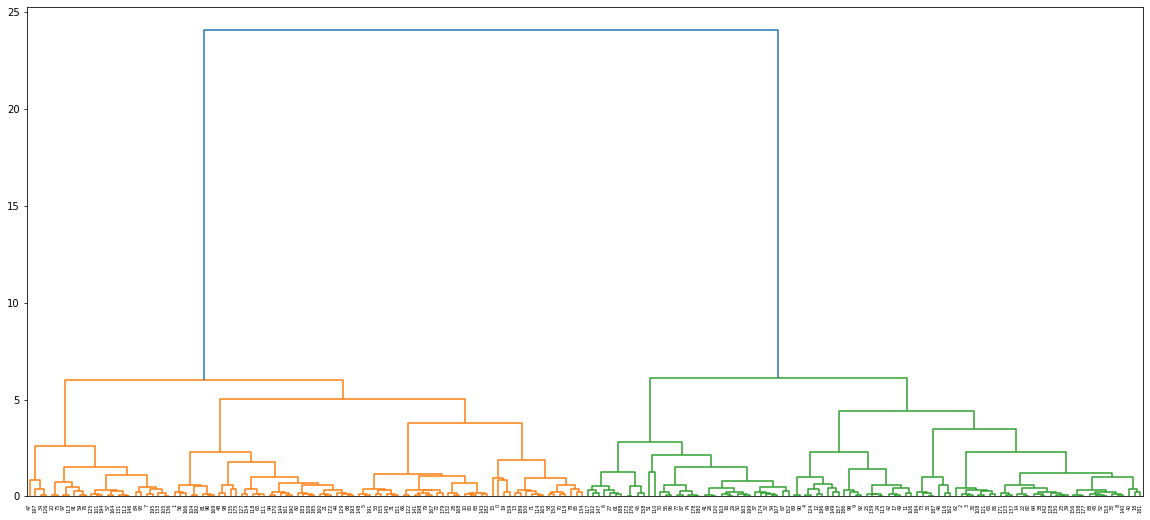

In [61]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [62]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [63]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0], dtype=int64)

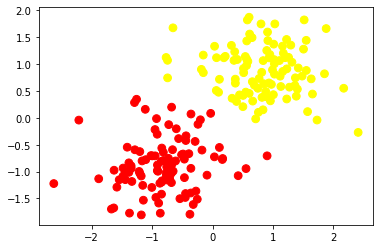

In [64]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)